In [2]:
# The data_dir variable is the only input allowed to your code. 
# Do not modify any file names in the image directory.
data_dir = "./MASI_pets"
# Add your code in the cells.

In [5]:
import os, operator
from PIL import Image
from tabulate import tabulate

# set path to image directory
data_dir = "./MASI_pets"
path = data_dir

# create lists to store image metadata
images_list = []
image_names = []
pet_names = []
owner_initials = []
widths = []
heights = []
sizes = []
aspect_ratios = []

# loop through images in directory and add to list
for images in os.listdir(path):   
    images_list.append(Image.open(os.path.join(path, images)))
    
# get info from each image
for i in images_list:

    # get image name
    name = i.filename.removeprefix('./MASI_pets/')
    image_names.append(name)
    
    # get pet name
    x = '_'
    pet_name = name.split(x, 1)[0]
    pet_names.append(pet_name)
    
    # get owner initials
    temp = name.split(x, 1)
    if len(temp) > 0: 
        initials = temp[1]
    y = '.'
    initials = initials.split(y, 1)[0]
    owner_initials.append(initials)
    
    # get image dimensions and size
    width = i.width
    height = i.height
    widths.append(width)
    heights.append(height)
    sizes.append(width * height)
    
    # get aspect ratio
    aspect_ratio = round((width / height), 2)
    aspect_ratios.append(aspect_ratio)
    
images_table = []

# loop to add info with correct format for table
i = 0
while i < len(images_list):
    image_info = []
    image_info.append(image_names[i])
    image_info.append(pet_names[i])
    image_info.append(owner_initials[i])
    image_info.append(widths[i])
    image_info.append(heights[i])
    image_info.append(sizes[i])
    image_info.append(aspect_ratios[i])
    images_table.append(image_info)
    i += 1

# create and sort table
sorted_images_table = sorted(images_table, key = lambda x: (-x[5], x[1]))

# print table
header = ['Image Name', 'Pet Name', 'Owner Initials', 'Width', 'Height', 'Size', 'Aspect Ratio']
print(tabulate(sorted_images_table, headers = header, tablefmt = "rst"))

=========================  ==================  ================  =======  ========  ========  ==============
Image Name                 Pet Name            Owner Initials      Width    Height      Size    Aspect Ratio
=========================  ==================  ================  =======  ========  ========  ==============
Yasha_SR.jpg               Yasha               SR                   3456      4608  15925248            0.75
Arthur_FR.jpg              Arthur              FR                   3024      4032  12192768            0.75
August_XY.jpg              August              XY                   3024      4032  12192768            0.75
Disney_XY.jpg              Disney              XY                   4032      3024  12192768            1.33
Francie_CK.jpg             Francie             CK                   3024      4032  12192768            0.75
Hamilton_CK.png            Hamilton            CK                   3024      4032  12192768            0.75
Mango_LC.jpg       

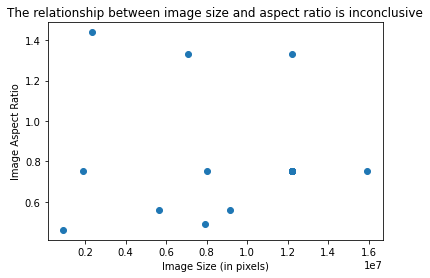

In [6]:
import matplotlib.pyplot as plt

# set labels and graph scatterplot
plt.scatter(sizes, aspect_ratios)
plt.title("The relationship between image size and aspect ratio is inconclusive")
plt.xlabel("Image Size (in pixels)")
plt.ylabel("Image Aspect Ratio")
plt.show()

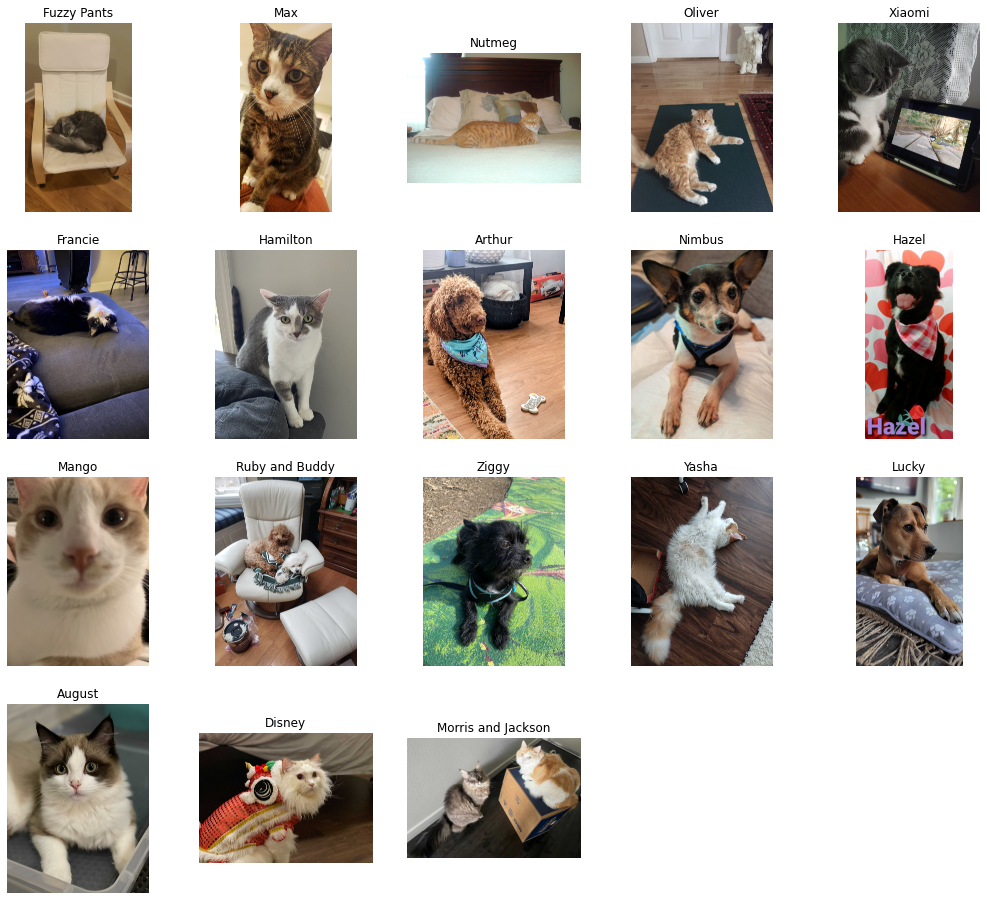

In [10]:
import math

# create figure
fig = plt.figure(figsize = (18, 16))
columns = 5
rows = math.ceil(len(images_list) / columns)

images_display = []

# loop to group relevant image info
i = 0
while i < len(images_list):
    display_info = []
    display_info.append(owner_initials[i])
    display_info.append(pet_names[i])
    display_info.append(images_list[i])
    images_display.append(display_info)
    i += 1

# sort images
sorted_images_display = sorted(images_display, key = operator.itemgetter(0, 1))

# display images
i = 1
while i < len(images_list) + 1:
    fig.add_subplot(rows, columns, i)
    plt.imshow(sorted_images_display[i - 1][2])
    plt.axis('off')
    plt.title(sorted_images_display[i - 1][1])
    i += 1